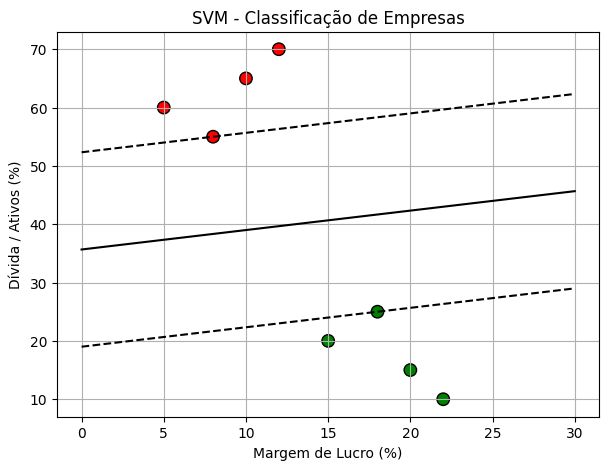

In [39]:
# ==============================
# Exemplo SVM: Empresas Saudáveis vs Em Risco
# ==============================

# Importar bibliotecas necessárias
import numpy as np                 # Para manipulação de arrays numéricos
import matplotlib.pyplot as plt    # Para criar gráficos
from sklearn import svm            # Para usar o modelo SVM

# 1) Criar dados fictícios (cada linha: [Margem de Lucro, Dívida/Ativos])
X = np.array([
    [15, 20], [18, 25], [20, 15], [22, 10],  # Empresas saudáveis
    [5, 60], [8, 55], [10, 65], [12, 70]     # Empresas em risco
])

# 2) Criar as etiquetas (labels) para classificação
# 1 = saudável, 0 = em risco
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

# 3) Criar o modelo SVM com kernel linear (reta separadora)
modelo = svm.SVC(kernel='linear')

# 4) Treinar o modelo com os dados (X) e etiquetas (y)
modelo.fit(X, y)

# 5) Obter os coeficientes (w) da reta de decisão
w = modelo.coef_[0]  # Vetor de pesos da equação da reta

# 6) Obter o termo independente (b) da reta de decisão
b = modelo.intercept_[0]

# 7) Criar pontos no eixo X para desenhar a reta
xx = np.linspace(0, 30)  # Valores entre 0 e 30 (margem de lucro)

# 8) Calcular os valores Y correspondentes à reta separadora
# Fórmula: w0*x + w1*y + b = 0  =>  y = -(w0*x + b) / w1
yy = -(w[0] * xx + b) / w[1]

# 9) Calcular a margem máxima (distância até aos support vectors)
margin = 1 / np.sqrt(np.sum(w ** 2))

# 10) Calcular as linhas paralelas à reta separadora que definem as margens
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

# 11) Criar gráfico
plt.figure(figsize=(7,5))

# 12) Definir cores para cada ponto (verde = saudável, vermelho = risco)
cores = ['red' if label == 0 else 'green' for label in y]

# 13) Desenhar pontos (empresas)
plt.scatter(X[:, 0], X[:, 1], c=cores, s=80, edgecolors='k')

# 14) Desenhar a reta separadora
plt.plot(xx, yy, 'k-')  # Linha sólida preta

# 15) Desenhar as margens (linhas tracejadas)
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 16) Adicionar rótulos dos eixos
plt.xlabel("Margem de Lucro (%)")
plt.ylabel("Dívida / Ativos (%)")

# 17) Adicionar título
plt.title("SVM - Classificação de Empresas")

# 18) Ativar grelha
plt.grid(True)

# 19) Mostrar o gráfico
plt.show()
